# CS5131 Assignment 3

## Information
**Problem description:** Placeholder

**Objective:** Placeholder

**Team members:** Li Yi Cheng (M20503) and Ranen Chow (M20504)

**Methodology:** Supervised learning

**Category:** Regression and Classification

**Data:** [pH Recognition Data from Kaggle](https://www.kaggle.com/robjan/ph-recognition)

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from math import sqrt

# Add any other libraries you are importing here later

## Read Data

In [3]:
df = pd.read_csv("ph-data.csv") # Place the csv file IN THE SAME FOLDER as this file
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [4]:
df.describe(include='all')

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


## Exploratory Data Analysis (EDA)

## Data Visualisation

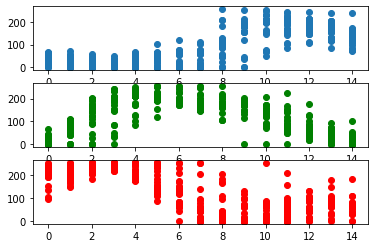

In [5]:
fig, ax = plt.subplots(3)
ax[0].scatter(df.label,df.blue)
ax[1].scatter(df.label,df.green,color='green')
ax[2].scatter(df.label,df.red,color='red')

plt.show()

## Splitting Data for Training and Testing

In [6]:
X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Testing Different Machine Learning (ML) Models
Since the problem can be formulated as a classification problem or a regression problem, we try both classification models and regression models.

### Classification Models

#### K-Nearest Neighbors Classifier

**Firstly,** we try different k-values, using the *uniform* (the default) weights function.

In [ ]:
k_range = range(1, 26)
uniform_accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    uniform_accuracy_scores.append(accuracy_score(y_pred, y_test))

We plot a graph using matplotlib to compare accuracy between different K values.

In [ ]:
plt.plot(k_range, uniform_accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(1, 26))  # makes x-axis values integers
plt.title("Accuracy Scores for KNN Classifier (uniform weight function)")
plt.show()

It appears that a k value of 4 produces the highest accuracy.

**Secondly,** we try changing the weight function to *'distance'*. This means that the model will "weight points by the inverse of their distance.... closer neighbors of a query point will have a greater influence than neighbors which are further away." (Source: [sklearn.neighbors.KNeighborsClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier))

The models made above used a uniform (the default) weights function.

In [ ]:
distance_accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    distance_accuracy_scores.append(accuracy_score(y_pred, y_test))

Once again, we plot a graph using matplotlib to compare accuracy between different K values.

In [ ]:
plt.plot(k_range, distance_accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(1, 26))  # makes x-axis values integers
plt.title("Accuracy Scores for KNN Classifier (distance weight function)")
plt.show()

This time, it appears that $k=20$ produces the best accuracy score.

Finally, let us compare accuracy scores between the two different weight functions.

In [ ]:
plt.plot(k_range, uniform_accuracy_scores, label='uniform')
plt.plot(k_range, distance_accuracy_scores, label='distance')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(1, 26))  # makes x-axis values integers
plt.title("Accuracy Scores for KNN Classifier (both weight functions)")
plt.legend()
plt.show()

From the table above, we can see that the KNN Classifier model with the highest accuracy score is one where $k=20$ and the distance weight function is used. 

In [ ]:
knn_classifier_best = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn_classifier_best.fit(X_train, y_train)
y_pred = knn_classifier_best.predict(X_test)
print(accuracy_score(y_test, y_pred))

#### SVC

Firstly, we try linear kernel type.

In [8]:
# LINEAR KERNEL
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)
print("Accuracy score for linear kernal type is", accuracy_score(y_test, y_pred))

Accuracy score for linear kernal type is 0.6097560975609756


Secondly, we try poly kernel type. We look at different degrees.

In [20]:
degree_range = range(2, 8)

for d in degree_range:
    svc_poly = SVC(kernel='poly', degree=d, gamma='scale')
    svc_poly.fit(X_train, y_train)
    y_pred = svc_poly.predict(X_test)
    print("Accuracy score for poly kernal type with degree", d, "is", accuracy_score(y_test, y_pred))

Accuracy score for poly kernal type with degree 2 is 0.6463414634146342
Accuracy score for poly kernal type with degree 3 is 0.725609756097561
Accuracy score for poly kernal type with degree 4 is 0.7134146341463414
Accuracy score for poly kernal type with degree 5 is 0.7134146341463414
Accuracy score for poly kernal type with degree 6 is 0.7012195121951219
Accuracy score for poly kernal type with degree 7 is 0.7012195121951219


Thirdly, we try rbf kernel type.

In [10]:
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)
print("Accuracy score for rbf kernal type is", accuracy_score(y_test, y_pred))

Accuracy score for rbf kernal type is 0.676829268292683


Fourthly, we try sigmoid kernel type.

In [14]:
svc_sigmoid = SVC(kernel='sigmoid', gamma='scale')
svc_sigmoid.fit(X_train, y_train)
y_pred = svc_sigmoid.predict(X_test)
print("Accuracy score for sigmoid kernal type is", accuracy_score(y_test, y_pred))

Accuracy score for sigmoid kernal type is 0.07317073170731707


As we can see, the best SVC model is one with poly kernel type with a degree of 3.

In [22]:
svc_best = SVC(kernel='poly', degree=3, gamma='scale')
svc_best.fit(X_train, y_train)
y_pred = svc_best.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.725609756097561


#### Gaussian Process Classification

In [30]:
gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)
y_pred = gpc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6402439024390244


#### Decision Tree Classifier

Firstly, we make a Decision Tree Classifier such that "nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples" (Source: [sklearn.tree.DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)) by using the default value of `max_depth` (i.e. `None`).

In [34]:
dtc_default = DecisionTreeClassifier()
dtc_default.fit(X_train, y_train)
y_pred = dtc_default.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.725609756097561


Next, we try different `max_depth` values.

In [44]:
max_depth_range = range(1, 21)
accuracy_scores = []

for md in max_depth_range:
    dtc = DecisionTreeClassifier(max_depth=md)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

Now, let us plot a graph showing how accuracy score changes with max depth.

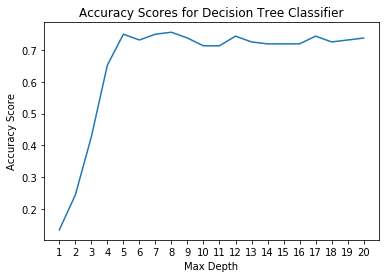

In [45]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(1, 21))  # makes x-axis values integers
plt.title("Accuracy Scores for Decision Tree Classifier")
plt.show()

From the graph, the best `max_depth` value is 7.

In [41]:
dtc_best = DecisionTreeClassifier(max_depth=7)
dtc_best.fit(X_train, y_train)
y_pred = dtc_best.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7560975609756098


As you can see, setting `max_depth=7` results in a higher accuracy score than the default value of `max_depth`.

#### Random Forest Classifier

First, we try different numbers of trees in the forest. 

In [65]:
n_estimators_range = range(5, 101)
accuracy_scores = []

for ne in n_estimators_range:
    rfc = RandomForestClassifier(n_estimators=ne)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
max_accuracy_score = max(accuracy_scores)
best_n_estimators = n_estimators_range[accuracy_scores.index(max_accuracy_score)]
print(best_n_estimators, max_accuracy_score)

96 0.7865853658536586


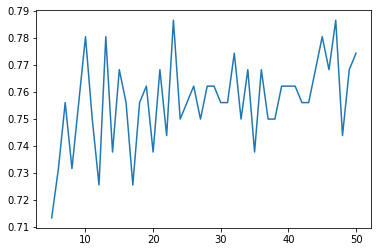

In [60]:
plt.plot(n_estimators_range, accuracy_scores)
plt.show()

### Regression Models

#### Polynomial Regression model of pH against each colors respectively

First we will plot 3 seperate polynomial regression models for pH against blue, green and red respectively, to find out if pH can be predicted using only one of the colors (the process of finding the best degree for polynomial fit will be omitted for this example)

In [7]:
pH = df.label[:,np.newaxis]
blue = df.blue[:,np.newaxis]
green = df.green[:,np.newaxis]
red = df.red[:,np.newaxis]


polynomialfeatures = PolynomialFeatures(degree = 6)
blue = polynomialfeatures.fit_transform(blue)
green = polynomialfeatures.fit_transform(green)
red = polynomialfeatures.fit_transform(red)

blue_train, blue_test, pH_blue_train, pH_blue_test = train_test_split(blue,pH,test_size=0.2)
green_train, green_test, pH_green_train, pH_green_test = train_test_split(blue,pH,test_size=0.2)
red_train, red_test, pH_red_train, pH_red_test = train_test_split(blue,pH,test_size=0.2)


bluemodel = LinearRegression()
bluemodel.fit(blue_train,pH_blue_train)
pH_blue_predict = bluemodel.predict(blue_test)

greenmodel = LinearRegression()
greenmodel.fit(green_train,pH_green_train)
pH_green_predict = greenmodel.predict(green_test)

redmodel = LinearRegression()
redmodel.fit(red_train,pH_red_train)
pH_red_predict = redmodel.predict(red_test)

bluermse = np.sqrt(mean_squared_error(pH_blue_test,pH_blue_predict))
bluer2 = r2_score(pH_blue_test,pH_blue_predict)

greenrmse = np.sqrt(mean_squared_error(pH_green_test,pH_green_predict))
greenr2 = r2_score(pH_green_test,pH_green_predict)

redrmse = np.sqrt(mean_squared_error(pH_red_test,pH_red_predict))
redr2 = r2_score(pH_red_test,pH_red_predict)

print ("Blue root mean squared error: " + str(bluermse))
print ("Blue r squared value: " + str(bluer2))
print ("Green root mean squared error: " + str(greenrmse))
print ("Green r squared value: " + str(greenr2))
print ("Red root mean squared error: " + str(redrmse))
print ("Red r squared value: " + str(redr2))

Blue root mean squared error: 1.7102665623332074
Blue r squared value: 0.8439349885336602
Green root mean squared error: 2.1245286051953207
Green r squared value: 0.7346720025352814
Red root mean squared error: 2.132447435090024
Red r squared value: 0.7444032152670537


Although the r squared values may seem good, this method of predicting pH is flawed as according to graphs plotted previously the graph of each color against pH is not a one to one function, which means it is impossible to predict pH using only one color

#### Linear Regression model of pH against all 3 colors

Hence we will now attempt to fit a linear regression model to all 3 independent variables (colors) and dependent variable (pH)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_pred, y_test))
r2 = r2_score(y_pred, y_test)
print("Root mean squared error: " + str(rmse))
print("R squared value: " + str(r2))

Root mean squared error: 2.4151494092561157
R squared value: 0.6843624018223358


The R squared value seems to be unsatisfactory. It might indicate that the trend is non linear. Hence, we will try to fit n degree polynomial regression model to the dataset.

#### Polynomial Regression model of pH against all 3 colors

Here we will fit degree 2 to 15 polynomial regression model to the data and plot a graph of root mean squared error and r squared to see what degree of polynomial will give the best fit. 

In [24]:
rmse = []
r2 = []
index = []
for n in range (1, 16):
    polynomialfeatures = PolynomialFeatures(degree = n)
    X_poly_test = polynomialfeatures.fit_transform(X_test)
    X_poly_train = polynomialfeatures.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly_train,y_train)
    y_pred = model.predict(X_poly_test)
    rmse.append(sqrt(mean_squared_error(y_pred, y_test)))
    r2.append(r2_score(y_pred, y_test))
    index.append(n)
    print ("Degree Processed: " + str(n))
    

Degree Processed: 1
Degree Processed: 2
Degree Processed: 3
Degree Processed: 4
Degree Processed: 5
Degree Processed: 6
Degree Processed: 7
Degree Processed: 8
Degree Processed: 9
Degree Processed: 10
Degree Processed: 11
Degree Processed: 12
Degree Processed: 13
Degree Processed: 14
Degree Processed: 15


Let's plot a graph of root mean squared error and r squared against degree of polynomial. 

Root mean squared values: [2.4151494092561157, 1.5792358902350634, 1.265336749847097, 1.4143388836303608, 2.50872216072883, 2.422780704944803, 5.718097509800888, 16.999023069301554, 67.69702060531829, 398.35363510708345, 615.1664161106514, 5786.133036187842, 20578.99358295347, 61800.88353208856, 609210.0065248788]
R squared values: [0.5265527942004771, 0.8368029291579793, 0.9049332525550073, 0.8993685097550372, 0.7133858528719639, 0.7464177066162871, 0.27340460726105054, 0.07912541387772187, 0.009104590529964929, -0.007978237893649709, -0.007673517090840187, -0.0016413755928816887, -0.010801781771326846, -2.9206483123322968e-05, -0.008423963902085774]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


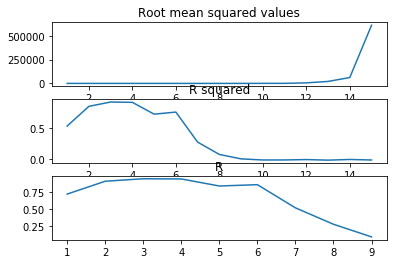

In [25]:
fig, ax = plt.subplots(3)
print ("Root mean squared values: " + str(rmse))
print ("R squared values: " + str(r2))
ax[0].plot(index,rmse)
ax[0].set_title("Root mean squared values")
ax[1].plot(index,r2)
ax[1].set_title("R squared")
ax[2].plot(index,np.sqrt(r2))
ax[2].set_title("R")


plt.show()

Assumption: Random state = 1 in train test split

For a good model, the RMSE should be close to zero while the R squared value should be a positive value that is close to one. According to the graph and the data printed, the degree that has the best R squared value is 3 while the degree that has the best RMSE is also 3. After degree 6, due to overfitting, the model become horrible as seen by the rapidly increasing RMSE and decreasing R squared value. From degree 10 onwards, r squared becomes negative, which means the dataset cannot be explained by the n degree polynomial regression model at all.

In conclusion, polynomial regression with a degree of 2 to 5 is a good model, with degree 3 being the best. Beyond degree 6, overfitting occurs which eventually causes extreme RMSE values.

## Final Model